In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets

In [2]:
#Hyperparameter
batch_size = 128
learning_rate = 1e-2
num_epoches = 20

In [3]:
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Processing...
Done!


In [4]:
class CNN(nn.Module):
    def __init__(self, in_dim, n_class):
        super(CNN, self).__init__()
        self.conv=nn.Sequential(
            nn.Conv2d(in_dim,6,3,stride=1,padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6,16,5,stride=1,padding=0),
            nn.ReLU(True),
            nn.MaxPool2d((2,2)))

        self.fc = nn.Sequential(
            nn.Linear(400, 120), nn.Linear(120, 84), nn.Linear(84, n_class))
    def forward(self,x):
            out = self.conv(x)
            out = out.view(out.size(0),-1)
            out = self.fc(out)
            return out


In [7]:
model = CNN(1, 10)
model = model.cuda()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
for epoch in range(num_epoches):
    print('epoch{}'.format(epoch+1))
    print('*'*10)
    running_loss=0.0
    running_acc=0.0
    for i,data in enumerate(train_loader,1):
        img,label=data
        img = img.cuda()
        label = label.cuda()
        img = Variable(img)
        label = Variable(label)
        #forward
        out=model(img)
        loss=criterion(out,label)
        running_loss+=loss.data[0]*label.size(0)
        _,pred=torch.max(out,1)
        num_correct=(pred==label).sum()
        accuracy=(pred==label).float().mean()
        running_acc +=num_correct.data[0]
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #
        if i % 300 == 0:
            print('[{}/{}] Loss: {:.6f}, Acc: {:.6f}'.format(
                epoch + 1, num_epoches, running_loss / (batch_size * i),
                running_acc / (batch_size * i)))
    print('Finish {} epoch, Loss: {:.6f}, Acc: {:.6f}'.format(
        epoch + 1, running_loss / (len(train_dataset)), running_acc / (len(
            train_dataset))))
    model.eval()
    eval_loss = 0
    eval_acc = 0
    for data in test_loader:
        img, label = data

        img = Variable(img, volatile=True).cuda()
        label = Variable(label, volatile=True).cuda()

        out = model(img)
        loss = criterion(out, label)
        eval_loss += loss.data[0] * label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        eval_acc += num_correct.data[0]
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(
        test_dataset)), eval_acc / (len(test_dataset))))
    print()

# savemodel
torch.save(model.state_dict(), './cnn.pth')

epoch1
**********
[1/20] Loss: 2.294286, Acc: 0.139974
Finish 1 epoch, Loss: 2.278495, Acc: 0.228983
Test Loss: 2.201852, Acc: 0.402400

epoch2
**********
[2/20] Loss: 1.561980, Acc: 0.617656
Finish 2 epoch, Loss: 1.197886, Acc: 0.698133
Test Loss: 0.446033, Acc: 0.869100

epoch3
**********
[3/20] Loss: 0.407683, Acc: 0.878255
Finish 3 epoch, Loss: 0.377899, Acc: 0.886617
Test Loss: 0.303780, Acc: 0.909100

epoch4
**********
[4/20] Loss: 0.294032, Acc: 0.911120
Finish 4 epoch, Loss: 0.285762, Acc: 0.913967
Test Loss: 0.231965, Acc: 0.930200

epoch5
**********
[5/20] Loss: 0.241058, Acc: 0.927552
Finish 5 epoch, Loss: 0.233191, Acc: 0.929550
Test Loss: 0.200574, Acc: 0.940500

epoch6
**********
[6/20] Loss: 0.203748, Acc: 0.938281
Finish 6 epoch, Loss: 0.195470, Acc: 0.941517
Test Loss: 0.162385, Acc: 0.949400

epoch7
**********
[7/20] Loss: 0.172776, Acc: 0.947187
Finish 7 epoch, Loss: 0.166857, Acc: 0.949367
Test Loss: 0.139206, Acc: 0.958000

epoch8
**********
[8/20] Loss: 0.148768, 

In [15]:
torch.save(model, './cnn_net.pth')

/home/cs/anaconda3/lib/python3.6/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [16]:
a=torch.load('./cnn_net.pth')

In [37]:
label

5

In [111]:
from PIL import Image
from numpy import eye                                                            
arr = (eye(200)*255).astype('uint8') # sample array
im = Image.fromarray(arr) # monochromatic image
imrgb = Image.merge('RGB', (im,im,im)) # color image
imrgb.show()

In [146]:
img

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.  

In [251]:
%matplotlib inline
import numpy as np
from PIL import Image
import torch
import torchvision
import cv2

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from IPython.display import Image 

import IPython


In [278]:
img, label = train_dataset[9119]

In [279]:
img=img.numpy()

In [280]:
label

9

In [281]:
img[0].shape

(28, 28)

In [245]:
img[0].shape

(28, 28)

In [247]:
img=img*255

In [248]:
img.shape

(1, 28, 28)

In [249]:
Img.show()

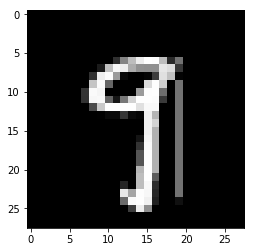

In [255]:
imshow(img[0],cmap='Greys_r'
      )
# plt.imshow('lena_1', cmap='Greys_r')


In [283]:
img=img.reshape((1,1,28,28))

In [284]:
imgt=torch.from_numpy(img)

In [285]:
imgt = Variable(imgt).cuda()

In [286]:
output=model(imgt)

In [305]:
pro,pred=torch.max(output,1)

In [304]:
print(pro)

Variable containing:
 6.9332
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [275]:
model.eval()    # Change model to 'eval' mode (BN uses moving mean/var).
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images).cuda()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 98 %


In [277]:
images

Variable containing:
(0 ,0 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
           ...             ⋱             ...          
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
     ⋮ 

(1 ,0 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
           ...             ⋱             ...          
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
     ⋮ 

(2 ,0 ,.,.) = 
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  ...   0.00